<h3> IMPORT REQUIRED LIBRARIES </H3>

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl
import seaborn as sns
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [167]:
File1=('TCtrain.csv')           #LOAD FILES
File2=('TCtest.csv')

In [168]:
df1= pd.read_csv(File1)
df1.shape

(891, 12)

In [169]:
df2= pd.read_csv(File2)
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [170]:
df_test= df2.copy()
df_test.shape                  # creating an extra copy of test file

(418, 11)

In [171]:
df_train = df1.append(df2, ignore_index=True) # combined train and test file to lessen the coding part.

## EXPLORATORY DATA ANALYSIS

#### In this section, we will be :
Cleaning : fill in the missing values.
Plotting : create some interesting charts to get hidden insights out of the data.
Assumptions : we'll formulate hypotheses from the charts.

In [172]:
df_train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [173]:
df_train.shape

(1309, 12)

In [174]:
df_train.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

In [175]:
df_train.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [176]:
missing_dt = df_train.isnull()    #CHECK FOR NULL VALUES
missing_dt.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False


In [177]:
 for column in missing_dt.columns.values.tolist():
    print(column)
    print(missing_dt[column].value_counts())
    print("")

Age
False    1046
True      263
Name: Age, dtype: int64

Cabin
True     1014
False     295
Name: Cabin, dtype: int64

Embarked
False    1307
True        2
Name: Embarked, dtype: int64

Fare
False    1308
True        1
Name: Fare, dtype: int64

Name
False    1309
Name: Name, dtype: int64

Parch
False    1309
Name: Parch, dtype: int64

PassengerId
False    1309
Name: PassengerId, dtype: int64

Pclass
False    1309
Name: Pclass, dtype: int64

Sex
False    1309
Name: Sex, dtype: int64

SibSp
False    1309
Name: SibSp, dtype: int64

Survived
False    891
True     418
Name: Survived, dtype: int64

Ticket
False    1309
Name: Ticket, dtype: int64



### So, we have 263 missing values in AGE(train(891) and test data(418)), 295 values in CABIN, 2 in EMBARKED and 1 in FARE.

In [178]:
df_train.groupby(['Sex'])['Survived'].value_counts(normalize=True)

Sex     Survived
female  1.0         0.742038
        0.0         0.257962
male    0.0         0.811092
        1.0         0.188908
Name: Survived, dtype: float64

75% FEMALE AND 20% MALE PASSENGERS SURVIVED THE ACCIDENT

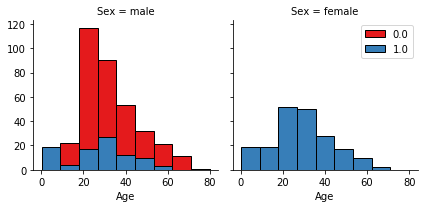

In [179]:
bins = np.linspace(df_train.Age.min(), df_train.Age.max(), 10)
g =sns.FacetGrid(df_train, col="Sex", hue="Survived", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Age', bins=bins,ec="k")

g.axes[-1].legend()
plt.show()


In [163]:
df_train['Died'] = 1 - df_train['Survived']

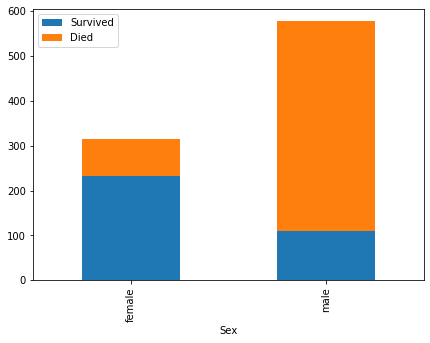

In [164]:
df_train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(7, 5),
                                                          stacked=True);

In [180]:
df_train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


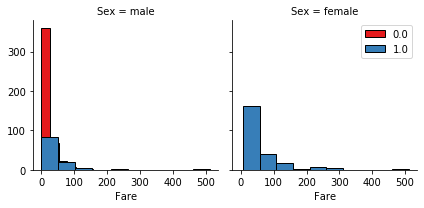

In [181]:
bins = np.linspace(df_train.Fare.min(), df_train.Fare.max(),10)
g = sns.FacetGrid(df_train, col ="Sex", hue ="Survived", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Fare', ec="k")

g.axes[-1].legend()
plt.show()

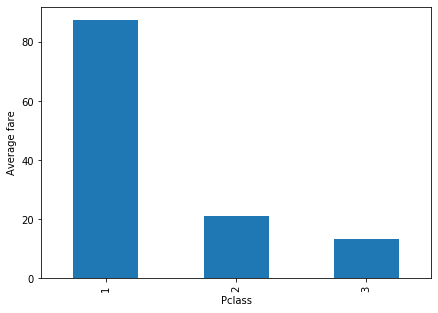

In [182]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
df_train.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(7, 5), ax = ax);

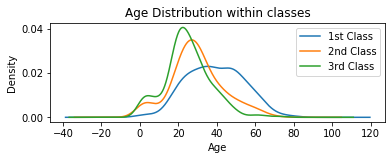

In [183]:
ax1 = plt.subplot2grid((2, 3), (1, 0), colspan=3)
df_train.Age[df_train.Pclass == 1].plot(kind='kde')    
df_train.Age[df_train.Pclass == 2].plot(kind='kde')
df_train.Age[df_train.Pclass == 3].plot(kind='kde')
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best')

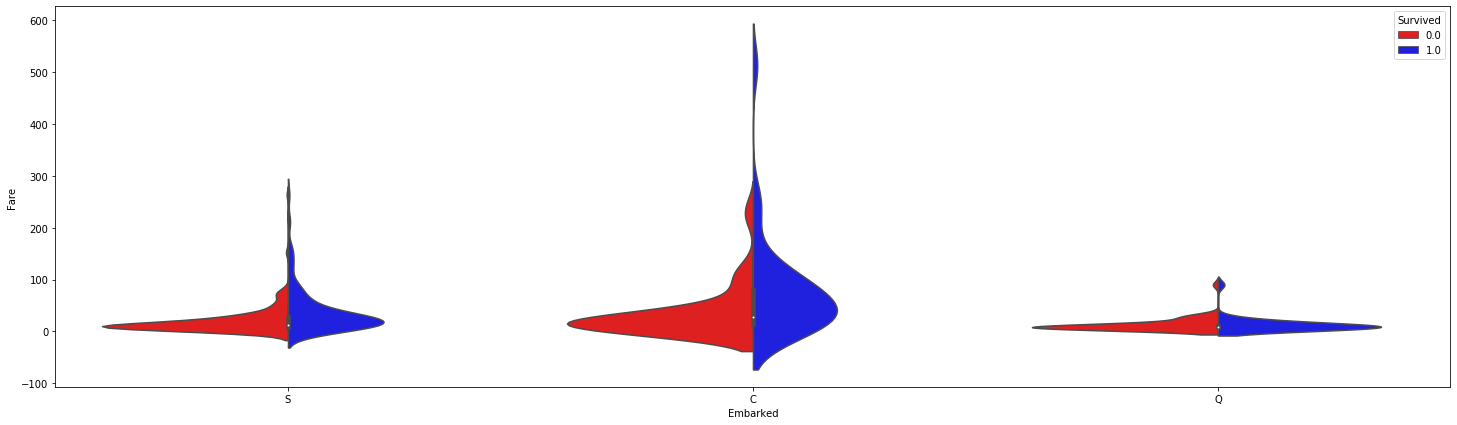

In [184]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=df_train, split=True, palette={0: "r", 1: "b"});

## FEATURE ENGINEERING

In [185]:
df_train.drop(columns=['Cabin','Ticket'], axis=1,inplace= True)

## FEATURE ENGINEERING

Let's create a function to keep a track whecther a function has been processed or not.

In [186]:
def status(feature):
    print ('Processing', feature, ': done')

#### TITLES PROCESSING

In [187]:
titles = set()
for name in df_train['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [188]:
print (titles)

{'Rev', 'the Countess', 'Major', 'Dr', 'Dona', 'Don', 'Lady', 'Col', 'Mme', 'Mrs', 'Sir', 'Mr', 'Mlle', 'Jonkheer', 'Ms', 'Master', 'Miss', 'Capt'}


In [189]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}


def get_titles():
    # we extract the title from each name
    df_train['Title'] = df_train['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    df_train['Title'] = df_train.Title.map(Title_Dictionary)
    status('Title')
    return df_train

In [190]:
df_train = get_titles()

Processing Title : done


In [191]:
df_train.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,Mr
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,Mrs
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,Miss
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,Mrs
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,Mr


In [192]:
df_train[df_train['Title'].isnull()]

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title
1305,39.0,C,108.9,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,NaN


#### AGE PROCESSING

In [193]:
print (df_train.Age[:891].isnull().sum())

177


#### 177 Values missing in traing data

In [194]:
print (df_train.Age[891:].isnull().sum())

86


#### 86 Values missing in test data

In [195]:
grouped_train = df_train.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [196]:
grouped_median_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0


* Grouped by Sex, Pclass, Title  

In [197]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]


def process_age():
    global combined
    # a function that fills the missing values of the Age variable
    df_train['Age'] = df_train.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    status('age')
    return df_train

In [198]:
df_train = process_age()

Processing age : done


In [199]:
def process_name():
    global df_train
    # we clean the Name variable
    df_train.drop('Name', axis=1, inplace=True)
    
    titles_dummies = pd.get_dummies(df_train['Title'], prefix='Title')
    df_train = pd.concat([df_train, titles_dummies], axis=1)
    
    df_train.drop('Title', axis=1, inplace=True)
    
    status('names')
    return df_train

In [200]:
df_train = process_name()

Processing names : done


In [201]:
df_train.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,22.0,S,7.2500,0,1,3,male,1,0.0,0,0,1,0,0,0
1,38.0,C,71.2833,0,2,1,female,1,1.0,0,0,0,1,0,0
2,26.0,S,7.9250,0,3,3,female,0,1.0,0,1,0,0,0,0
3,35.0,S,53.1000,0,4,1,female,1,1.0,0,0,0,1,0,0
4,35.0,S,8.0500,0,5,3,male,0,0.0,0,0,1,0,0,0


In [202]:
def process_fare():
    global df_train
    # there's one missing fare value - replacing it with the mean.
    df_train.Fare.fillna(df_train.iloc[:891].Fare.mean(), inplace=True)
    status('fare')
    return df_train

In [203]:
df_train = process_fare()

Processing fare : done


In [204]:
def process_embarked():
    global df_train
    # two missing embarked values - filling them with the most frequent one in the train  set(S)
    df_train.Embarked.fillna('S', inplace=True)
    # dummy encoding 
    embarked_dummies = pd.get_dummies(df_train['Embarked'], prefix='Embarked')
    df_train = pd.concat([df_train, embarked_dummies], axis=1)
    df_train.drop('Embarked', axis=1, inplace=True)
    status('embarked')
    return df_train

In [205]:
df_train = process_embarked()

Processing embarked : done


In [206]:
def process_sex():
    global df_train
    # mapping string values to numerical one 
    df_train['Sex'] = df_train['Sex'].map({'male':1, 'female':0}, inplace= True)
    status('Sex')
    return df_train

In [207]:
def process_pclass():
    
    global df_train
    # encoding into 3 categories:
    pclass_dummies = pd.get_dummies(df_train['Pclass'], prefix="Pclass")
    
    # adding dummy variable
    df_train = pd.concat([df_train, pclass_dummies],axis=1)
    
    # removing "Pclass"
    df_train.drop('Pclass',axis=1,inplace=True)
    
    status('Pclass')
    return df_train

In [208]:
df_train = process_pclass()

Processing Pclass : done


In [209]:
def process_family():
    
    global df_train
    # introducing a new feature : the size of families (including the passenger)
    df_train['FamilySize'] = df_train['Parch'] + df_train['SibSp'] + 1
    
    # introducing other features based on the family size
    df_train['Singleton'] = df_train['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    df_train['SmallFamily'] = df_train['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    df_train['LargeFamily'] = df_train['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    status('family')
    return df_train

In [210]:
df_train = process_family()

Processing family : done


In [211]:
df_train['Sex'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [212]:
print (df_train.shape)

(1309, 23)


In [213]:
np.isnan(df_train).head()

,Age,Fare,Parch,PassengerId,Sex,SibSp,Survived,Title_Master,Title_Miss,Title_Mr,...,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,FamilySize,Singleton,SmallFamily,LargeFamily
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [214]:
df_train.head()

,Age,Fare,Parch,PassengerId,Sex,SibSp,Survived,Title_Master,Title_Miss,Title_Mr,...,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,FamilySize,Singleton,SmallFamily,LargeFamily
0,22.0,7.2500,0,1,0,1,0.0,0,0,1,...,0,0,1,0,0,1,2,0,1,0
1,38.0,71.2833,0,2,1,1,1.0,0,0,0,...,1,0,0,1,0,0,2,0,1,0
2,26.0,7.9250,0,3,1,0,1.0,0,1,0,...,0,0,1,0,0,1,1,1,0,0
3,35.0,53.1000,0,4,1,1,1.0,0,0,0,...,0,0,1,1,0,0,2,0,1,0
4,35.0,8.0500,0,5,0,0,0.0,0,0,1,...,0,0,1,0,0,1,1,1,0,0


In [215]:
df_train.columns

Index(['Age', 'Fare', 'Parch', 'PassengerId', 'Sex', 'SibSp', 'Survived',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer',
       'Title_Royalty', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'FamilySize', 'Singleton', 'SmallFamily',
       'LargeFamily'],
      dtype='object')

In [216]:
def recover_train_test_target():
    global combined
    
    targets = pd.read_csv('./data/train.csv', usecols=['Survived'])['Survived'].values
    train = combined.iloc[:891]
    test = combined.iloc[891:]
    
    return train, test, targets

In [217]:
train = df_train[df_train.Survived.notnull()]

In [218]:
test = df_train[df_train.Survived.isnull()]
test.head()

,Age,Fare,Parch,PassengerId,Sex,SibSp,Survived,Title_Master,Title_Miss,Title_Mr,...,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,FamilySize,Singleton,SmallFamily,LargeFamily
891,34.5,7.8292,0,892,0,0,NaN,0,0,1,...,0,1,0,0,0,1,1,1,0,0
892,47.0,7.0000,0,893,1,1,NaN,0,0,0,...,0,0,1,0,0,1,2,0,1,0
893,62.0,9.6875,0,894,0,0,NaN,0,0,1,...,0,1,0,0,1,0,1,1,0,0
894,27.0,8.6625,0,895,0,0,NaN,0,0,1,...,0,0,1,0,0,1,1,1,0,0
895,22.0,12.2875,1,896,1,1,NaN,0,0,0,...,0,0,1,0,0,1,3,0,1,0


In [219]:
train.shape

(891, 23)

In [220]:
test.shape

(418, 23)